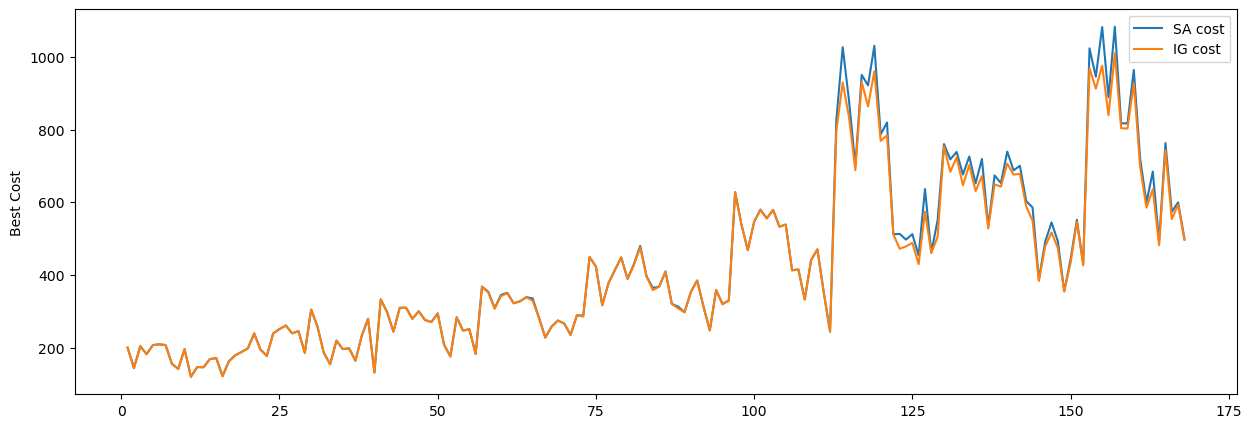

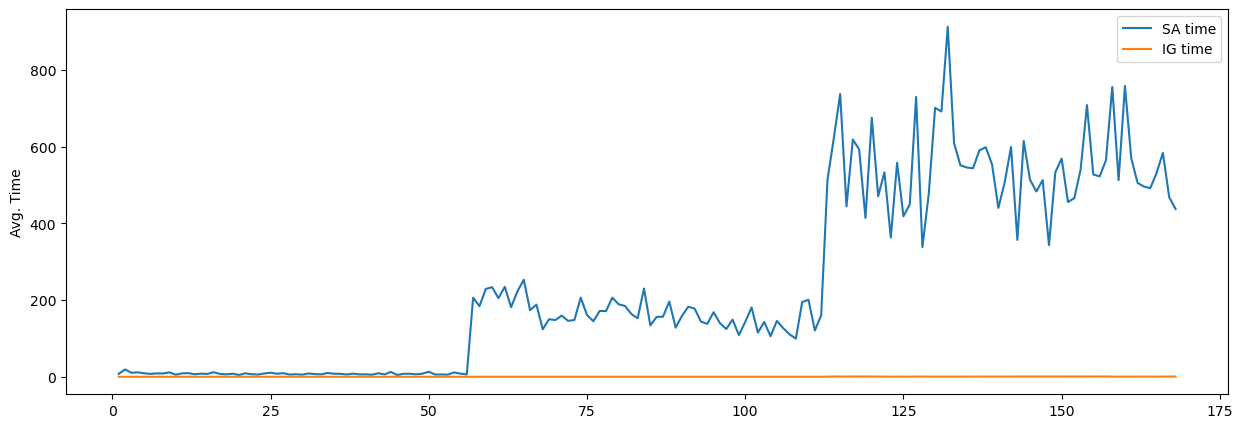

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

arquivo = pd.read_csv('everyone')

g_costs = list(arquivo['g_best_cost'])
sa_costs = list(arquivo['sa_best_cost'])
lit_costs = list()

for index, cost in enumerate(g_costs):
    if (cost == "N/A" or cost < sa_costs[index]):
        lit_costs.append(cost)
    else:
        lit_costs.append(sa_costs[index])

ig_costs = list(arquivo['ig_best_cost'])


plt.figure(figsize=(15, 5))

plt.ylabel('Best Cost')
plt.plot([x for x in range(1,169)],lit_costs, label="SA cost")
plt.plot([x for x in range(1,169)],ig_costs, label="IG cost")
plt.legend()
plt.show()

lit_avg_time = list(arquivo['sa_avg_time'])
ig_avg_time = list(arquivo['ig_avg_time'])

plt.figure(figsize=(15, 5))

plt.ylabel('Avg. Time')
plt.plot([x for x in range(1,169)],lit_avg_time, label = "SA time")
plt.plot([x for x in range(1,169)],ig_avg_time, label = "IG time")
plt.legend()
plt.show()